In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import geopandas as gpd
import heapq
import random
import timeit

import sys
sys.path.append('./../exploration') # this is where the magic is going down
sys.path.append('./..')

from intersections_and_roads import *
%matplotlib inline

In [2]:
# Read in the geolocation data
intersections = gpd.read_file('../cambridgegis_data_trans/Intersections/TRANS_Intersections.topojson')
street_centerline = gpd.read_file('../cambridgegis_data_trans/Street_Centerlines/TRANS_Centerlines.topojson')
intersection_graph, connection_dict = build_intersection_graph(intersections=intersections, street_centerline=street_centerline)

In [3]:
# randomly select a start and an end point on the graph for test
start = intersection_graph[np.random.choice(intersection_graph.keys())]
end = intersection_graph[np.random.choice(intersection_graph.keys())]

1014


In [24]:
def a_star_search(start, end, intersection_graph, connection_dict, get_road_cost, heuristic=null_heuristic):
    print 'start', start.id, 'end', end.id
    fringe = PriorityQueue()

    discovered_nodes = set()
    route_to_goal = dict()
    route_to_goal[start.id] = {'nodes': [], 'connections': []}

    fringe.push(start, 0)

    while not fringe.isEmpty():
        node = fringe.pop()
        discovered_nodes.add(node)

        #at the goal node
        if node.id == end.id:
            print 'here'
            return route_to_goal[node.id]
        
        connections = map(lambda ID: connection_dict[ID], node.get_connections())
        for connection in connections:
            child_id = connection.get_child(node.id)
            child = intersection_graph[child_id]

            #if we have not visited this node
            if not child in discovered_nodes:
                road_list = route_to_goal[node.id]['nodes'] + [child.id]
                connection_list = route_to_goal[node.id]['connections'] + [connection.id]
                cost_of_road_list = get_road_cost(road_list, connection_list, intersection_graph, connection_dict)
                # If we already have a route to this node
                if child.id in route_to_goal:
                    current_best_route = route_to_goal[child.id]
                    current_best_cost = get_road_cost(current_best_route['nodes'], current_best_route['connections'], intersection_graph, connection_dict)
                    print 'cost', cost_of_road_list, current_best_cost
                    if cost_of_road_list < current_best_cost:
                        route_to_goal[child.id] = {'nodes': road_list, 'connections': connection_list}
                else:
                    route_to_goal[child.id] = {'nodes': road_list, 'connections': connection_list}

                # update the fringe with this node
                fringe.update(child, get_road_cost(route_to_goal[child.id]['nodes'], route_to_goal[child.id]['connections'], intersection_graph, connection_dict) + heuristic(child, end))

In [25]:
# search the graph
route = a_star_search(start, end, intersection_graph, connection_dict, get_road_cost)

start 1608 end 1014
cost 1940.43023624 2426.87104905


In [26]:
print route

None


TypeError: 'NoneType' object has no attribute '__getitem__'

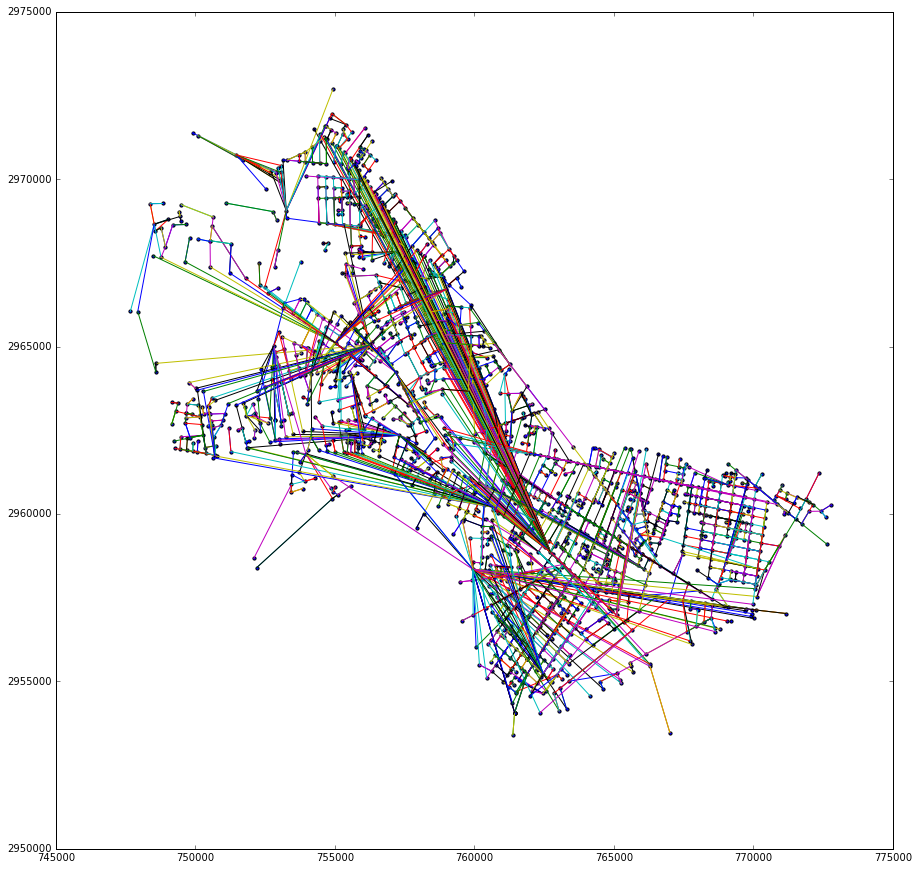

In [27]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))

xs = [intersection_graph[key].get_x_y()[0] for key in intersection_graph]
ys = [intersection_graph[key].get_x_y()[1] for key in intersection_graph]

for key in intersection_graph:
    node = intersection_graph[key]
    connections = map(lambda ID: connection_dict[ID], node.get_connections())
    for connection in connections:
        child_id = connection.get_child(node.id)
        child = intersection_graph[child_id]
        line_x = [node.get_x_y()[0], child.get_x_y()[0]]
        line_y = [node.get_x_y()[1], child.get_x_y()[1]]
        ax.plot(line_x, line_y)

ax.scatter(xs, ys, s=10)

xs = [intersection_graph[node].get_x_y()[0] for node in route['nodes']]
ys = [intersection_graph[node].get_x_y()[1] for node in route['nodes']]

ax.plot(xs, ys, c='r', linewidth=5)
# for i, node in enumerate(route):
#     x,y = intersection_graph[node].get_x_y()
#     if i == 0:
#         ax.scatter(x, y, c='r', s=50)
#     elif i == len(route)-1:
#         ax.scatter(x, y, c='r', s=50)
#     else:
#         ax.scatter(x, y, c='b', s=50)
plt.show()

In [ ]:
# timing for comparing heuristics down the line
def test():
#     start = intersection_graph[np.random.choice(intersection_graph.keys())]
#     end = intersection_graph[np.random.choice(intersection_graph.keys())]
    a_star_search(start, end, intersection_graph)

timeit.timeit("test()", setup="from __main__ import *", number=10)